In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Add project root (one level up from src/) to PYTHONPATH
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_ingestion.load_data import load_data
from src.data_inspection.data_info import data_info
from src.data_inspection.missing_values_analysis import MissingValueAnalyser
from src.data_processing.process import Process
from src.train_model.train_model import Train_Model


In [4]:
ld=load_data(data_source='../data/raw/flight.csv')
df = ld.load()



In [4]:
DataInfo=data_info(df)
DataInfo.get_info()



Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null 

In [5]:
DataInfo.get_stat_summary()

           DayOfWeek        DepTime        ArrTime     CRSArrTime  \
count  484551.000000  484551.000000  484551.000000  484551.000000   
mean        3.991605    1564.477865    1617.784438    1652.129929   
std         1.971466     452.235219     583.637660     466.096216   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000    1234.000000    1327.000000    1339.000000   
50%         4.000000    1620.000000    1737.000000    1723.000000   
75%         6.000000    1928.000000    2049.000000    2025.000000   
max         7.000000    2400.000000    2400.000000    2359.000000   

           FlightNum  ActualElapsedTime  CRSElapsedTime        AirTime  \
count  484551.000000      484551.000000   484551.000000  484551.000000   
mean     2139.207386         134.810422      131.400761     108.877134   
std      1812.677071          74.070374       71.542531      70.113513   
min         1.000000          15.000000      -21.000000       0.000000   
25%     


Missing Values Count by Column:
Org_Airport     1177
Dest_Airport    1479
dtype: int64


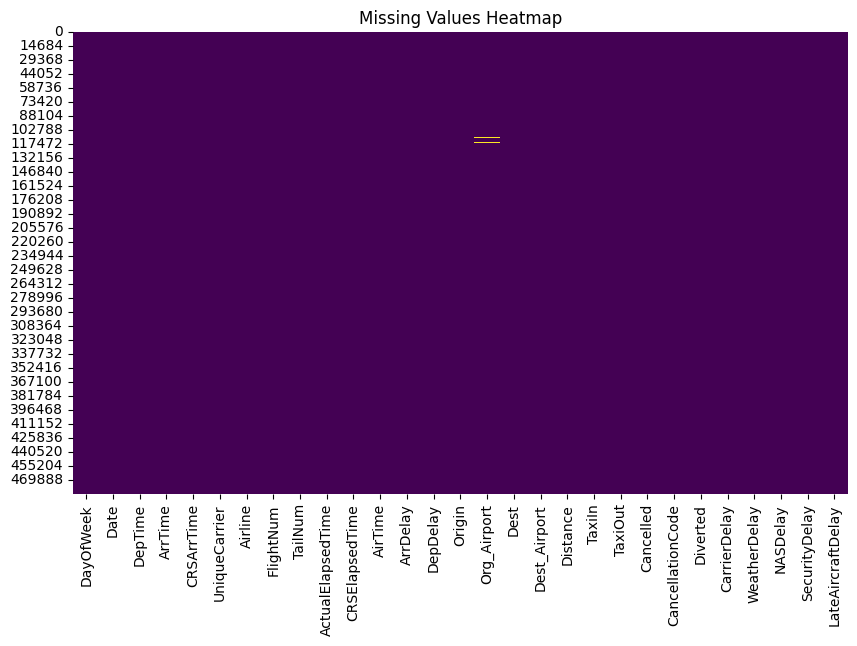

In [6]:
missing_value_analyser=MissingValueAnalyser(df)
missing_value_analyser.get_analysis()
missing_value_analyser.get_missing_value_visualise()

In [7]:
data_processor=Process(df)
df=data_processor.addColumnWhetherDelayed()
Origin_against_delays=df.groupby('Origin')['is_delayed'].mean().round(3)*100
Origin_against_delays


Origin
ABE    27.7
ABI    45.9
ABQ    13.2
ABY    43.7
ACT    13.0
       ... 
WYS     0.0
XNA    22.9
YAK     3.6
YKM    40.7
YUM    34.8
Name: is_delayed, Length: 274, dtype: float64

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

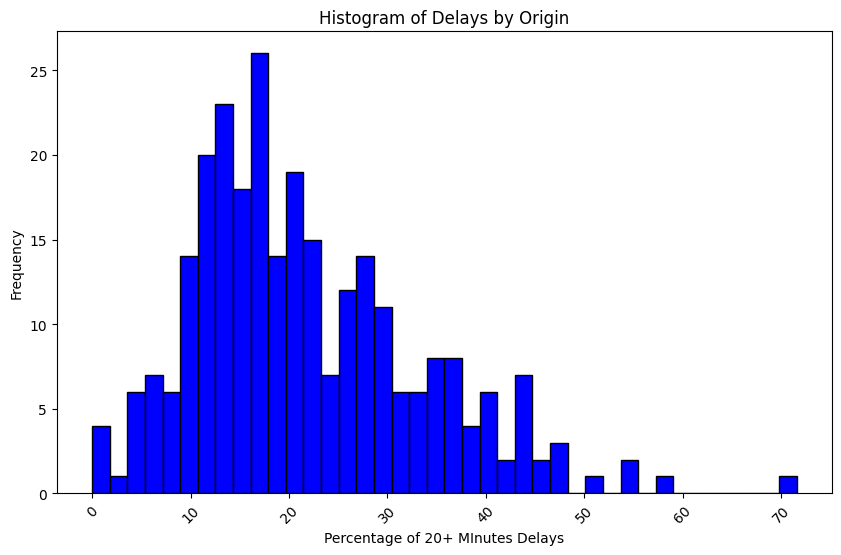

In [8]:
plt.figure(figsize=(10,6))
plt.hist(Origin_against_delays.values, bins=40, color='blue', edgecolor='black')
plt.title('Histogram of Delays by Origin')
plt.xlabel('Percentage of 20+ MInutes Delays')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

In [9]:
data_processor=Process(df)
df=data_processor.addColumnWhetherDelayed()
Day_against_delays=df.groupby('DayOfWeek')['is_delayed'].mean().round(3)*100
Day_against_delays

DayOfWeek
1    23.5
2    22.2
3    24.6
4    22.8
5    21.3
6    28.3
7    24.5
Name: is_delayed, dtype: float64

In [10]:
df=data_processor.convertTimetoDateTime()


In [11]:
df=data_processor.dropColumnNulls()


In [12]:
taxiOut_thresholds=data_processor.getairportthresholds()
nasDelay_thresholds=15

In [13]:
df=data_processor.label_congestion_column(taxiout_thresholds=taxiOut_thresholds)


In [14]:
df=data_processor.addTimeWindowColumn()


In [15]:
modified_df=data_processor.createTimeWindowSet(df=df)
modified_df

,Origin,time_window,num_flights,avg_taxiout,num_congested,Day_Of_Week,congestion_label
0,ABE,1900-01-01 06:00:00,1,21.0,0,1,0
1,ABE,1900-01-01 06:15:00,2,11.5,0,1,0
2,ABE,1900-01-01 06:30:00,2,18.0,0,1,0
3,ABE,1900-01-01 06:45:00,4,16.5,1,1,1
4,ABE,1900-01-01 07:00:00,4,21.0,1,3,1
...,...,...,...,...,...,...,...
14485,YUM,1900-01-01 20:30:00,1,29.0,1,7,1
14486,YUM,1900-01-01 21:00:00,8,16.5,4,6,1
14487,YUM,1900-01-01 21:15:00,4,8.5,0,7,0
14488,YUM,1900-01-01 21:30:00,2,14.5,0,5,0


In [16]:
modified_df=data_processor.createNewFeatures(modified_df)
modified_df

,Origin,time_window,num_flights,avg_taxiout,num_congested,Day_Of_Week,congestion_label,hour,prev_congestion,rolling_1h_avg_taxiout
0,ABE,1900-01-01 06:00:00,1,21.0,0,1,0,6,0.0,21.000000
1,ABE,1900-01-01 06:15:00,2,11.5,0,1,0,6,0.0,16.250000
2,ABE,1900-01-01 06:30:00,2,18.0,0,1,0,6,0.0,16.833333
3,ABE,1900-01-01 06:45:00,4,16.5,1,1,1,6,0.0,16.750000
4,ABE,1900-01-01 07:00:00,4,21.0,1,3,1,7,1.0,16.750000
...,...,...,...,...,...,...,...,...,...,...
14485,YUM,1900-01-01 20:30:00,1,29.0,1,7,1,20,0.0,20.541667
14486,YUM,1900-01-01 21:00:00,8,16.5,4,6,1,21,1.0,18.666667
14487,YUM,1900-01-01 21:15:00,4,8.5,0,7,0,21,1.0,15.750000
14488,YUM,1900-01-01 21:30:00,2,14.5,0,5,0,21,0.0,17.125000


In [17]:
ModelTrainer=Train_Model(modified_df)
X_train, y_train, X_test, y_test=ModelTrainer.TestTrainSplit()
print(X_train, X_test)


       num_flights  avg_taxiout  hour  Day_Of_Week  prev_congestion  \
0                1    21.000000     6            1              0.0   
1                2    11.500000     6            1              0.0   
2                2    18.000000     6            1              0.0   
3                4    16.500000     6            1              0.0   
4                4    21.000000     7            3              1.0   
...            ...          ...   ...          ...              ...   
11587            1    13.000000    11            5              0.0   
11588            6    13.166667    12            3              0.0   
11589            6    11.833333    12            7              1.0   
11590            3    12.666667    12            6              1.0   
11591            9    14.000000    12            3              0.0   

       rolling_1h_avg_taxiout  
0                   21.000000  
1                   16.250000  
2                   16.833333  
3                  

In [58]:
ModelTrainer.trainLogisticReg(X_train, y_train, X_test, y_test)

Confusion Matrix:
[[ 697  124]
 [ 183 1894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       821
           1       0.94      0.91      0.93      2077

    accuracy                           0.89      2898
   macro avg       0.87      0.88      0.87      2898
weighted avg       0.90      0.89      0.90      2898



Confusion Matrix:
[[ 744   77]
 [ 201 1876]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       821
           1       0.96      0.90      0.93      2077

    accuracy                           0.90      2898
   macro avg       0.87      0.90      0.89      2898
weighted avg       0.91      0.90      0.91      2898



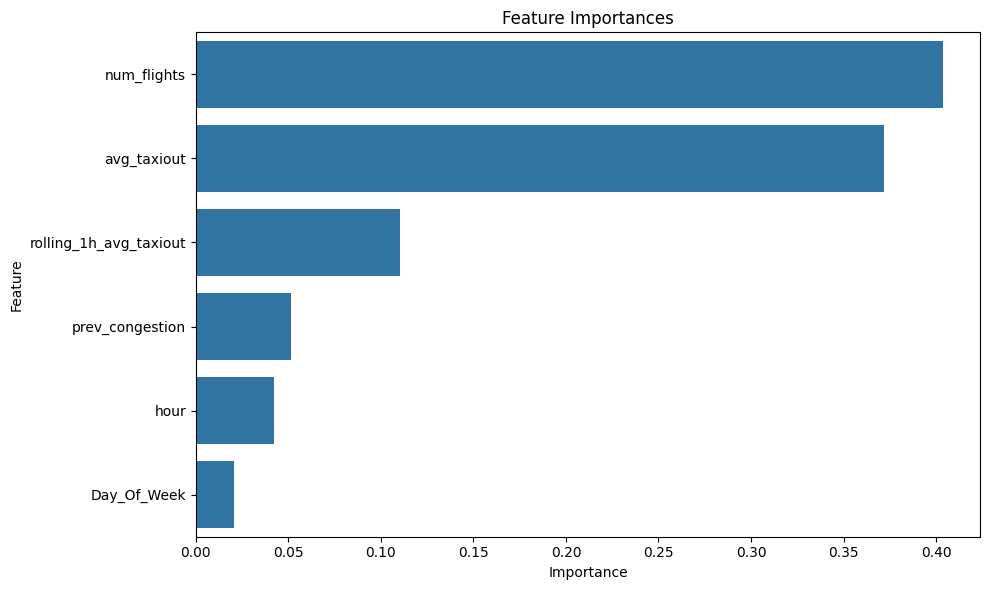

In [32]:
predicted_values=ModelTrainer.trainRandomForest(X_train, y_train, X_test, y_test)


In [19]:
ModelTrainer.bestParamsRandomForest(X_train, y_train, X_test, y_test)

Confusion Matrix:
[[ 669  152]
 [ 121 1956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       821
           1       0.93      0.94      0.93      2077

    accuracy                           0.91      2898
   macro avg       0.89      0.88      0.88      2898
weighted avg       0.90      0.91      0.91      2898


Optimized params:
{'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
ModelTrainer.trainXGB(X_train, y_train, X_test, y_test)

Confusion Matrix:
[[ 681  140]
 [ 113 1964]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       821
           1       0.93      0.95      0.94      2077

    accuracy                           0.91      2898
   macro avg       0.90      0.89      0.89      2898
weighted avg       0.91      0.91      0.91      2898

